<a href="https://colab.research.google.com/github/pkoneill/VisualizingBrainWaves/blob/main/Visualizing_Brain_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Fourier Transform

Video available at https://youtube.com/watch?v=spUNpyF58BY


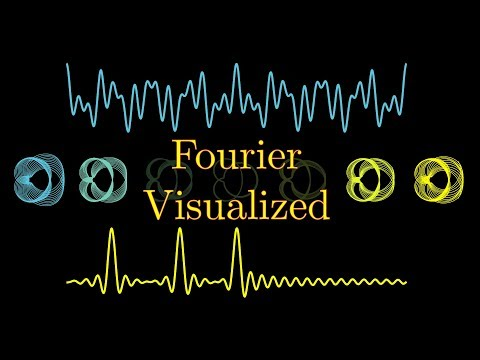

In [24]:
#@title Video 1: Fourier Visualized
from IPython.display import YouTubeVideo
video = YouTubeVideo(id='spUNpyF58BY', width=854, height=480, fs=1, end=149)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

## Objectives
In this tutorial, we will 

we will explore how filter built into an electroencephalogram (EEG) work to block unwanted signals from the recording electrodes and pass the meaningful signals coming from the underyling neural activity.





---
## Imports and helper functions
First, we'll need to import some Python packages that will allow us to simulate and plot data for this session. Please execute the cell(s) below to initialize the notebook environment.


In [12]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [14]:
#@title Figure Settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use("https://raw.githubusercontent.com/pkoneill/VisualizingBrainWaves/master/mplsettings")

In [ ]:
#@title Helper functions

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

----
## Simulate a periodic signal


In [15]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)
x

array([0.00000000e+00, 1.00005000e-04, 2.00010001e-04, ...,
       1.99979999e+00, 1.99989999e+00, 2.00000000e+00])

In [16]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)
sampled_f1 = [f1(i) for i in x]
sampled_f2 = [f2(i) for i in x]
sampled_fcomb = [(f1(i)+f2(i)) for i in x]

(-25.0, 25.0)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


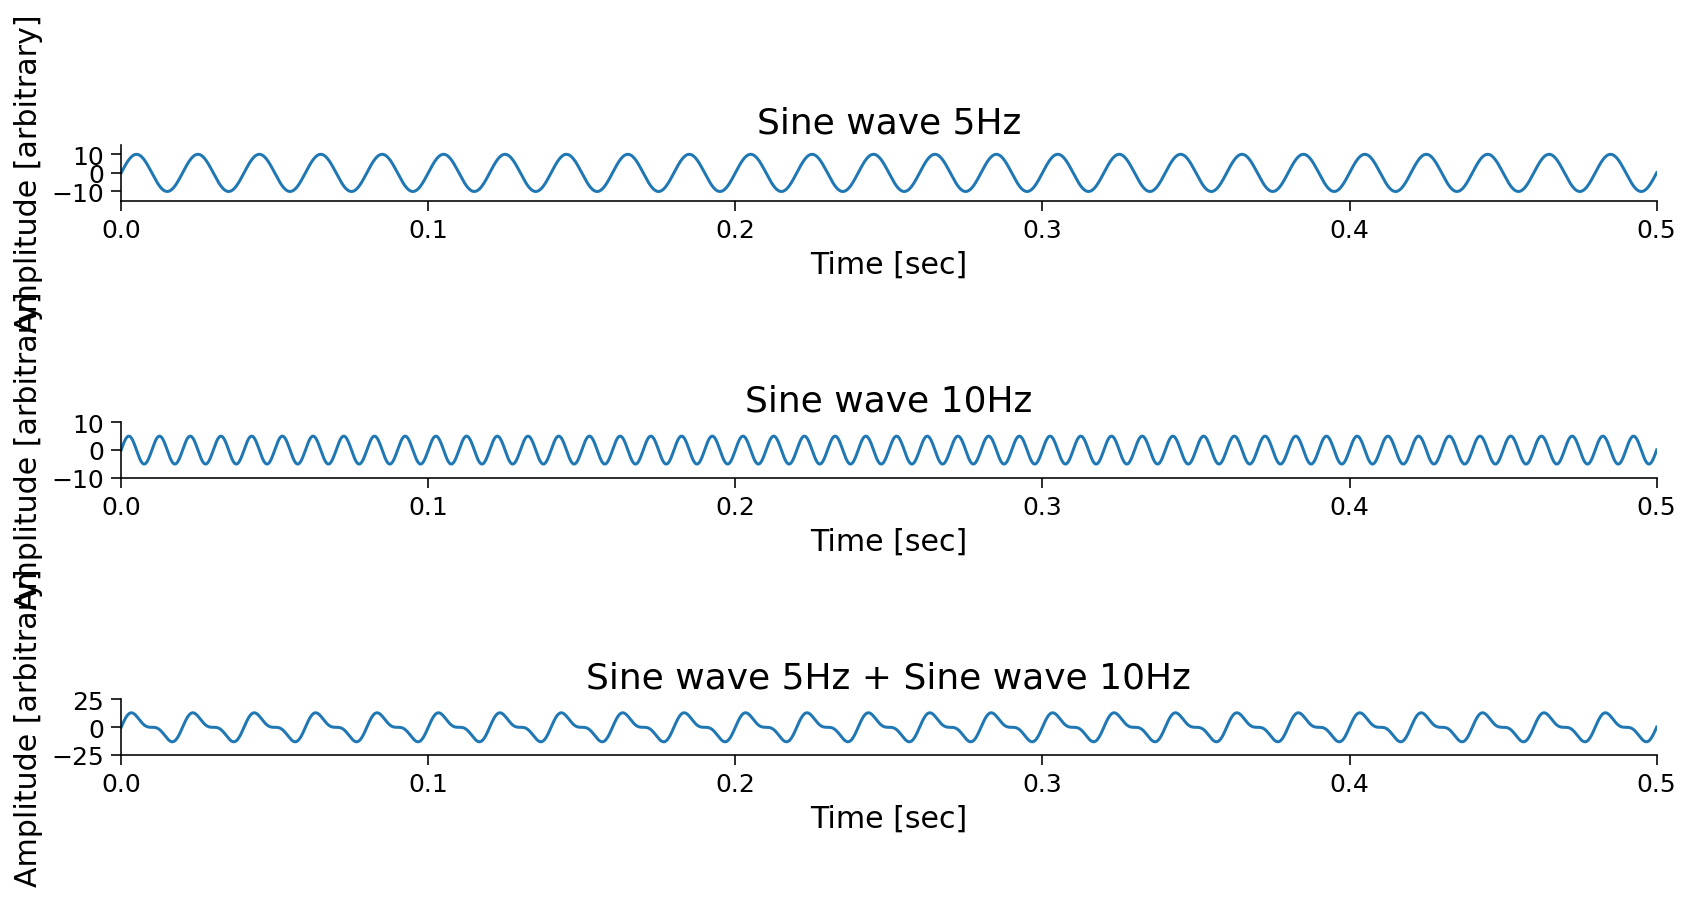

In [17]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 5Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-15, 15)

plt.subplot(312)
plt.plot(x, sampled_f2)
plt.title('Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-10, 10)

plt.subplot(313)
plt.plot(x, sampled_fcomb)
plt.title('Sine wave 5Hz + Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 0.5)
plt.ylim(-25, 25)

Calculate the 